# Sentiment Analysis

## Import and setup

In [1]:
import numpy as np
import pandas as pd
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK tokenization, lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Read in data and display first 10 rows
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option("display.max_colwidth", 10000)

In [2]:
# df = pd.read_csv('src/2018_clean_pinkbike_comments.csv')

In [3]:
with open('src/YYYY_clean_pinkbike_comments.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

df.head(10)

,comment_upvotes,comment_downvotes,lemmatized
0,1,0,"[hey, man, note, month, forest, fire, prevention, season, kunming, forest, trail, may, allow, enterbut, forest, trail, still, allow, enter, use, fire, source]"
1,1,0,"[hey, hoop, yep, know, fire, prevention, thankfully, close, bao, zhu, let, u, ride, sometime]"
5,30,0,"[matt, jones, video, frame, mind, video, one, best, last, year]"
6,18,1,"[literally, never, consider, might, brother, embarrass]"
7,15,0,"[actually, think, person, jono, nickname, something, like]"
8,1,0,"[bonkywonky, make, two, dude]"
9,3,0,"[say, shame, video, never, even, realize, matt, sibling, especially, twin]"
10,3,0,"[bonkywonky, think, want, admit, find, glad, one]"
11,16,0,"[well, round, lad, head, straight]"
12,14,0,"[uk, rider, badass]"


In [4]:
print (list(df))

['comment_upvotes', 'comment_downvotes', 'lemmatized']


### Sentiment Analysis
Sentiment analysis tries to determine the writer's attitude/option.  

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

,comment_upvotes,comment_downvotes,lemmatized,lemma_str
0,1,0,"[hey, man, note, month, forest, fire, prevention, season, kunming, forest, trail, may, allow, enterbut, forest, trail, still, allow, enter, use, fire, source]",hey man note month forest fire prevention season kunming forest trail may allow enterbut forest trail still allow enter use fire source
1,1,0,"[hey, hoop, yep, know, fire, prevention, thankfully, close, bao, zhu, let, u, ride, sometime]",hey hoop yep know fire prevention thankfully close bao zhu let u ride sometime
5,30,0,"[matt, jones, video, frame, mind, video, one, best, last, year]",matt jones video frame mind video one best last year
6,18,1,"[literally, never, consider, might, brother, embarrass]",literally never consider might brother embarrass
7,15,0,"[actually, think, person, jono, nickname, something, like]",actually think person jono nickname something like


In [ ]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(50)

In [ ]:
# create a new feature for length of the review
df['cmnts_len'] = df['lemma_str'].astype(str).apply(len)

In [ ]:
# Create a new feature for the word count fo the review
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head(10)

## Let's Examine the Word Frequencies
    

In [10]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [11]:
mostcommon = FreqDist(allwords).most_common(100)

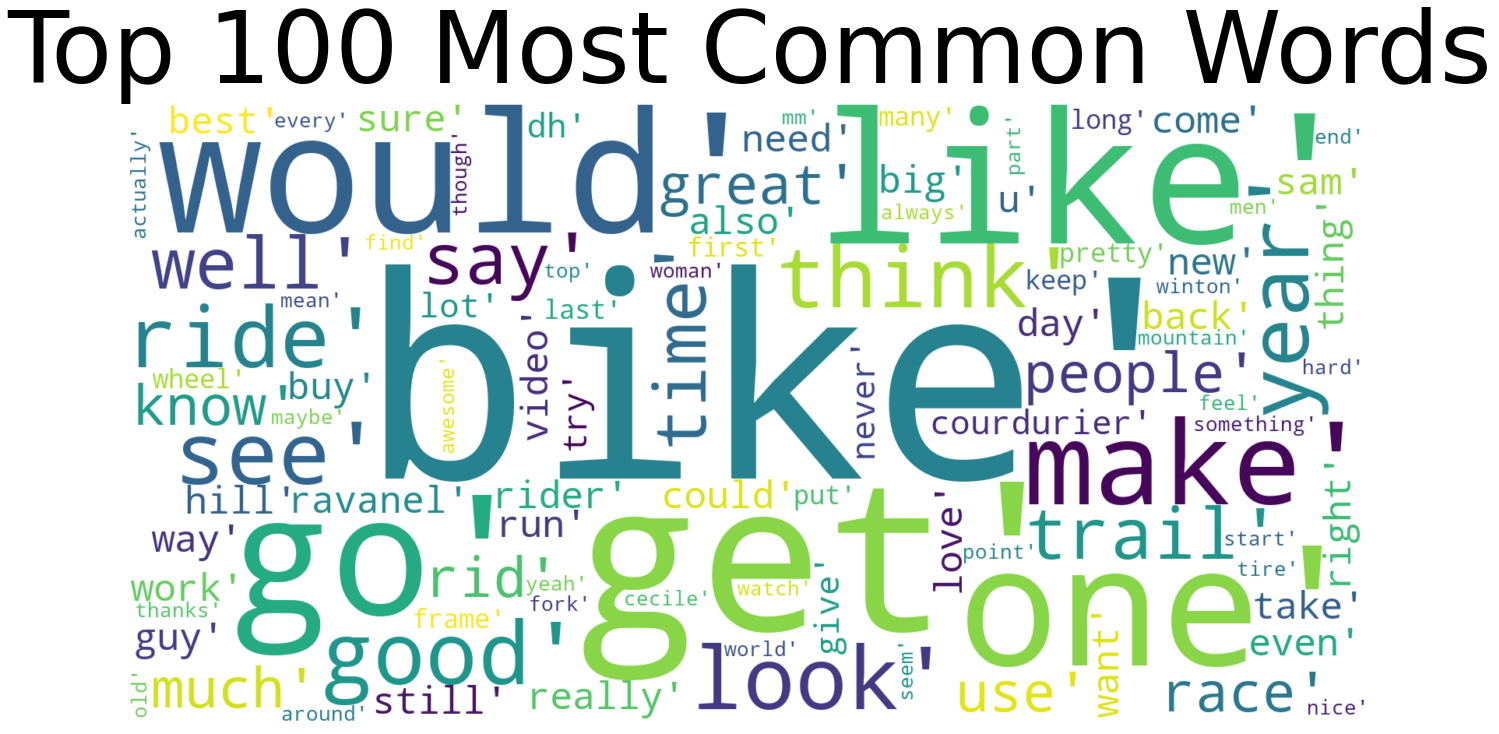

In [12]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

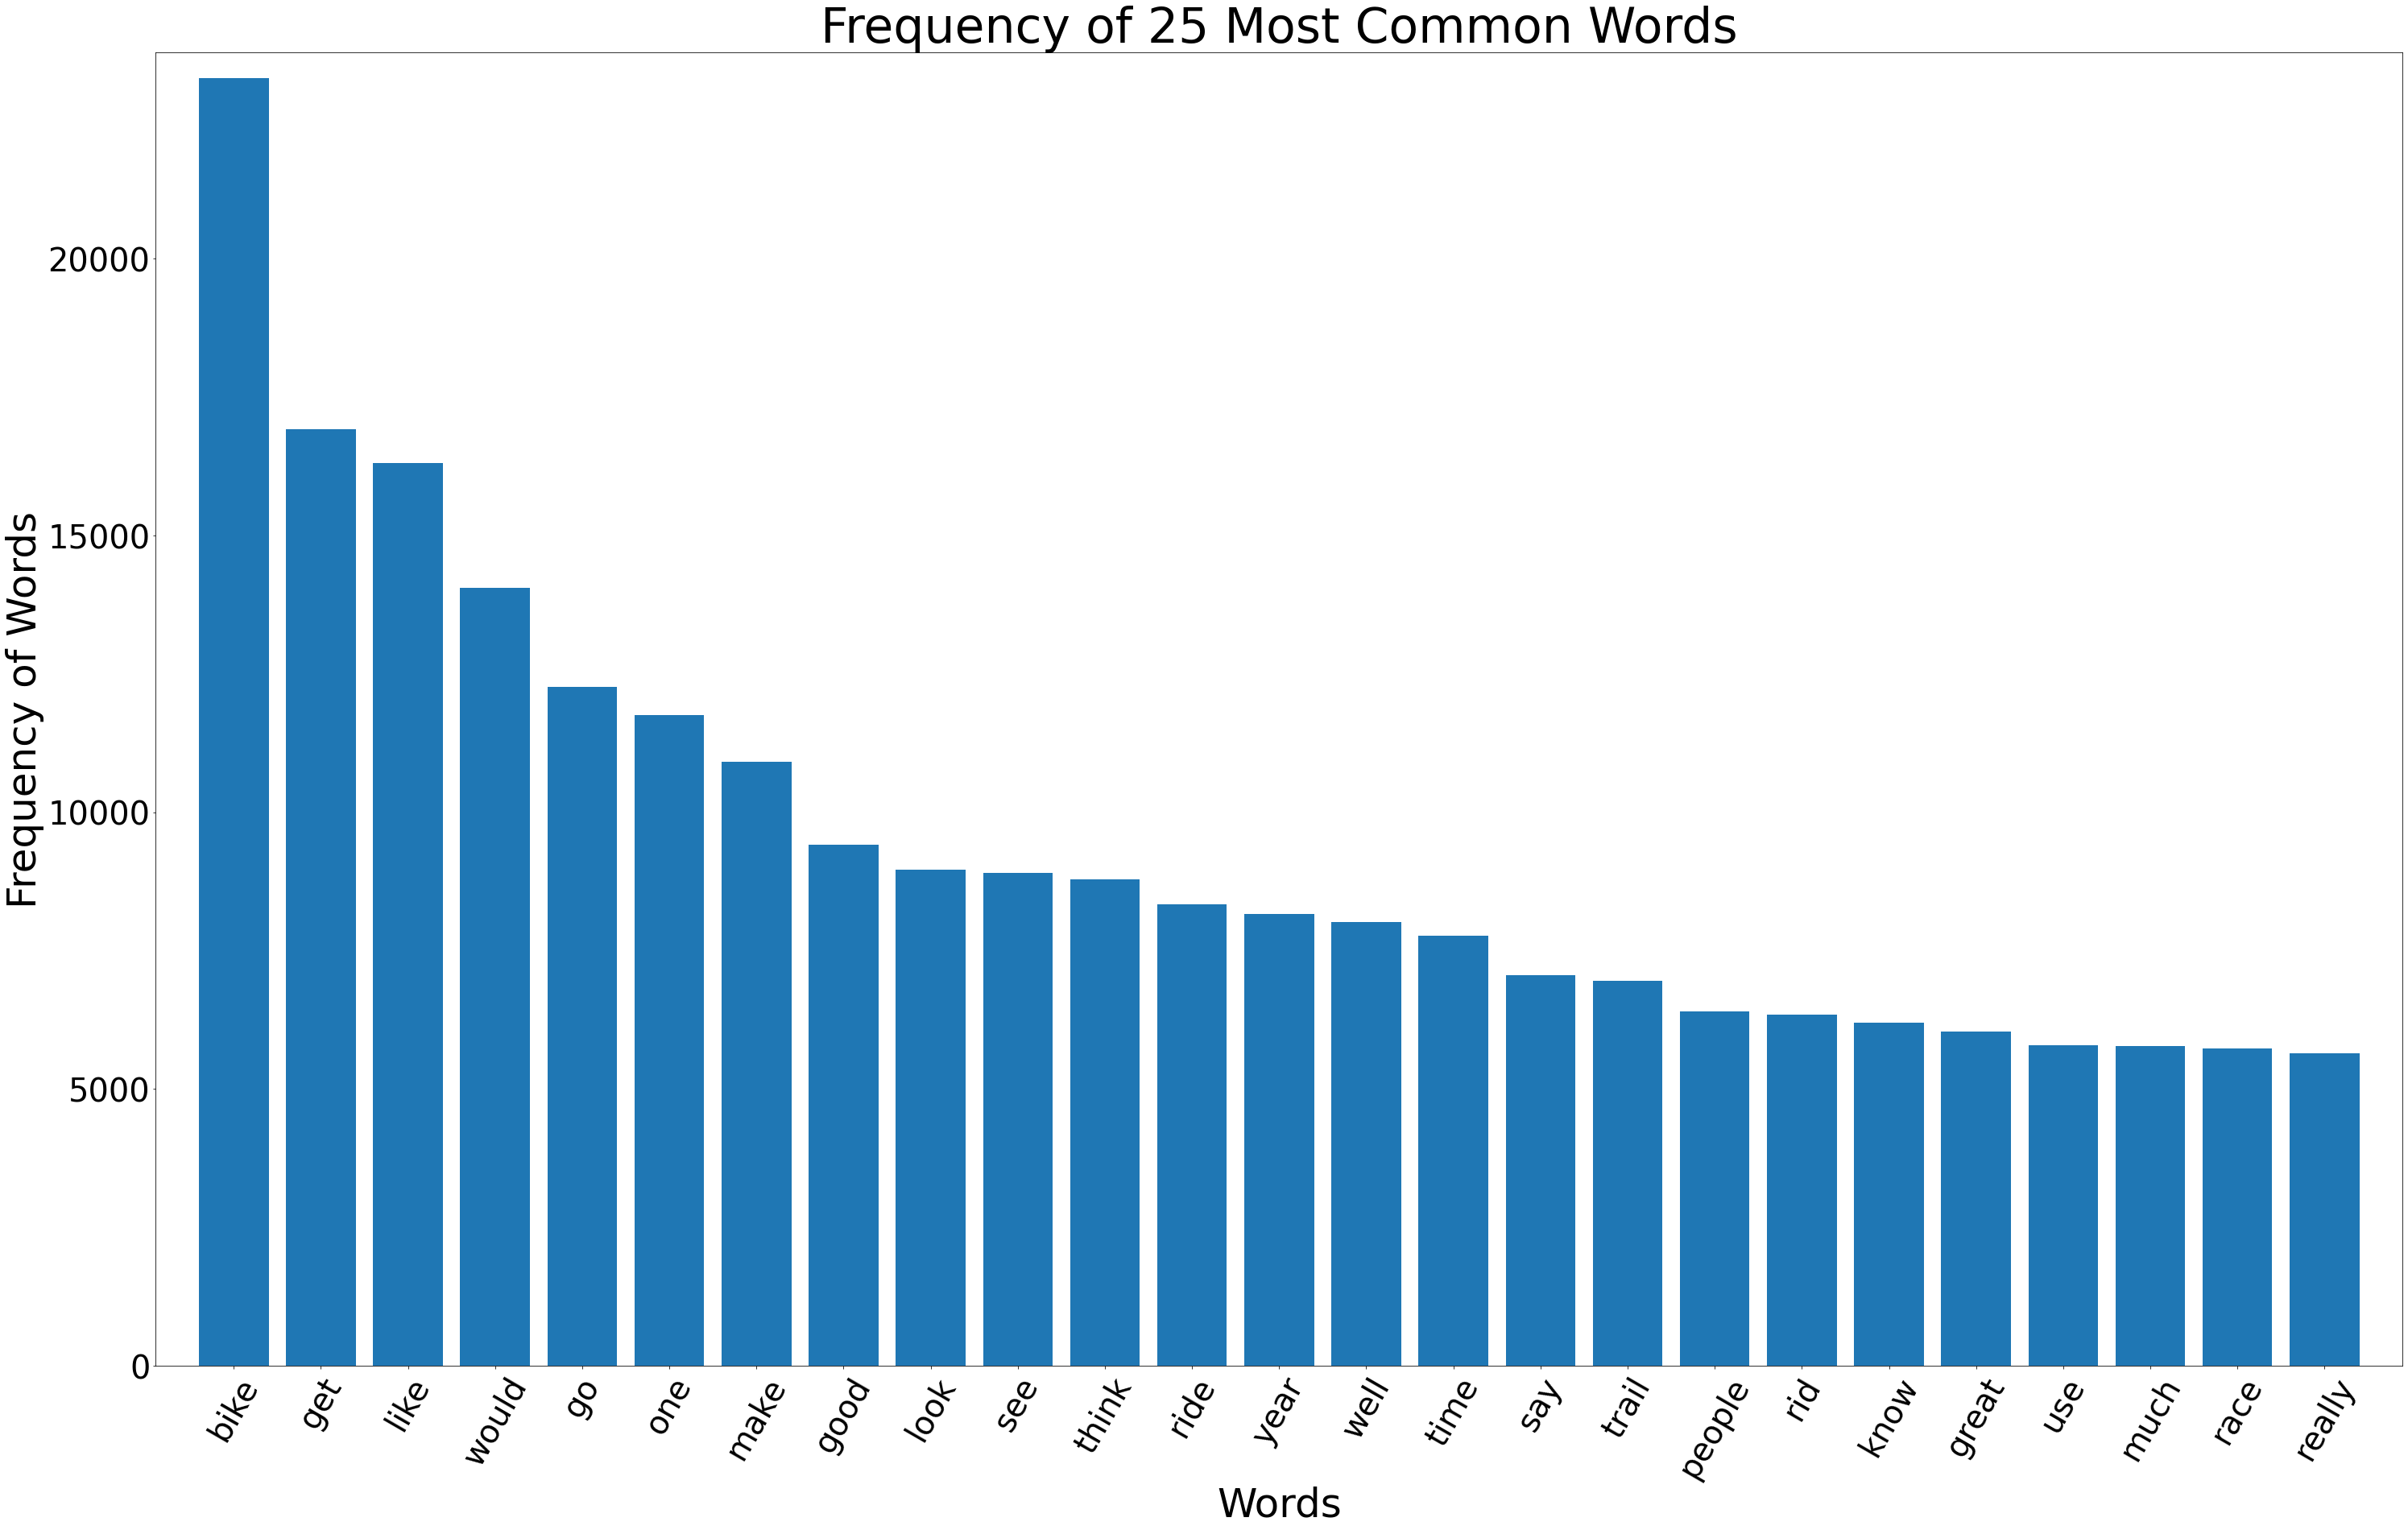

In [13]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
# create a figure
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()